# Learning Points & Summary

Congratulations on completing another challenging data science project! Today we've seen how to grab some raw data and create some interesting charts using Pandas and Matplotlib. We've

* used `.groupby()` to explore the number of posts and entries per programming language

* converted strings to Datetime objects with `to_datetime()` for easier plotting

* reshaped our DataFrame by converting categories to columns using `.pivot()`

* used `.count()` and `isna().values.any()` to look for NaN values in our DataFrame, which we then replaced using `.fillna()`

* created (multiple) line charts using `.plot()` with a for-loop

* styled our charts by changing the size, the labels, and the upper and lower bounds of our axis.

* added a `legend` to tell apart which line is which by colour

* smoothed out our time-series observations with `.rolling().mean()` and plotted them to better identify trends over time.

## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

```
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
```



## Import Statements

In [1]:
import pandas as pd

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
df = pd.read_csv('QueryResults.csv', header=0, names=['DATE', 'TAG', 'POSTS'])

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [3]:
# First 5 rows:
print(df.head())

# Last 5 rows:
print(df.tail())

                  DATE         TAG  POSTS
0  2008-07-01 00:00:00          c#      3
1  2008-08-01 00:00:00    assembly      8
2  2008-08-01 00:00:00  javascript    163
3  2008-08-01 00:00:00           c     85
4  2008-08-01 00:00:00      python    124
                     DATE         TAG  POSTS
2155  2021-07-01 00:00:00           r   4974
2156  2021-07-01 00:00:00        ruby    531
2157  2021-07-01 00:00:00  javascript  19265
2158  2021-07-01 00:00:00       swift   2486
2159  2021-07-01 00:00:00      python  26945


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [4]:
df.shape  # Result: 1991 rows, 3 columns

(2160, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [5]:
df.count()

DATE     2160
TAG      2160
POSTS    2160
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [6]:
# pd.options.display.float_format = "{:,.2f}".format
df.groupby('TAG').sum().sort_values('POSTS', ascending=False)

,POSTS
TAG,
javascript,2249592
java,1789885
python,1767439
c#,1490487
php,1410001
c++,732761
r,412959
c,362460
swift,299664


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [7]:
print(df.head())

df.groupby('TAG').count().sort_values('DATE', ascending=False)

                  DATE         TAG  POSTS
0  2008-07-01 00:00:00          c#      3
1  2008-08-01 00:00:00    assembly      8
2  2008-08-01 00:00:00  javascript    163
3  2008-08-01 00:00:00           c     85
4  2008-08-01 00:00:00      python    124


,DATE,POSTS
TAG,,
c#,157,157
assembly,156,156
c,156,156
c++,156,156
delphi,156,156
java,156,156
javascript,156,156
perl,156,156
php,156,156


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [8]:
# Selecting an Individual Cell
print(df.head(1))
print(df.DATE[1])
print(df['DATE'][1])

# Inspecting the Data Type
print(type(df['DATE'][1]))

                  DATE TAG  POSTS
0  2008-07-01 00:00:00  c#      3
2008-08-01 00:00:00
2008-08-01 00:00:00
<class 'str'>


In [9]:
# Convert the time str into a timestamp using to_datetime() method:
print(pd.to_datetime(df['DATE'][1]))
type(pd.to_datetime(df['DATE'][1])) # Check type again

2008-08-01 00:00:00


pandas._libs.tslibs.timestamps.Timestamp

In [10]:
# Convert the entire df['DATE'] column to timestamp data type:
# pd.to_datetime(df.DATE) returns new data (not changing it in original df), 
# therefore you need assign result of conversion to the original column with name DATE
df['DATE'] = pd.to_datetime(df['DATE'])
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,163
3,2008-08-01,c,85
4,2008-08-01,python,124


## Data Manipulation: Pivoting DataFrames



In [11]:
test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
                        'Power': [100, 80, 25, 50, 99, 75, 5, 30]})
test_df

,Age,Actor,Power
0,Young,Jack,100
1,Young,Arnold,80
2,Young,Keanu,25
3,Young,Sylvester,50
4,Old,Jack,99
5,Old,Arnold,75
6,Old,Keanu,5
7,Old,Sylvester,30


In [12]:
# The index are the categories for the rows. 
# The columns are the categories for the columns. 
# And the values are what you want in the new cells.
pivoted_df = test_df.pivot(index='Age', columns='Actor', values='Power')
pivoted_df

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75,99,5,30
Young,80,100,25,50


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [13]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,509.0,164.0,14.0,NaN,222.0,163.0,28.0,161.0,124.0,NaN,72.0,NaN
2008-09-01,28.0,320.0,1650.0,754.0,105.0,NaN,1136.0,639.0,131.0,481.0,540.0,6.0,289.0,NaN
2008-10-01,15.0,303.0,1989.0,810.0,112.0,NaN,1153.0,726.0,127.0,615.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1733.0,734.0,141.0,NaN,958.0,579.0,97.0,503.0,452.0,1.0,159.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-01,340.0,2666.0,7338.0,4750.0,271.0,828.0,10476.0,19889.0,154.0,5615.0,28289.0,6089.0,570.0,2914.0
2021-04-01,344.0,2469.0,6788.0,4363.0,187.0,688.0,9545.0,18754.0,143.0,5156.0,26688.0,5628.0,607.0,2540.0
2021-05-01,326.0,2274.0,6591.0,4617.0,179.0,702.0,9750.0,18555.0,123.0,5132.0,26251.0,5417.0,449.0,2216.0


In [14]:
# Examine the dimensions of the reshaped DataFrame
print(reshaped_df.shape)


(157, 14)


In [15]:
# Examine the head and the tail of the DataFrame:
print(reshaped_df.head())
print(reshaped_df.tail())

TAG         assembly      c      c#    c++  ...  python    r   ruby  swift
DATE                                        ...                           
2008-07-01       NaN    NaN     3.0    NaN  ...     NaN  NaN    NaN    NaN
2008-08-01       8.0   85.0   509.0  164.0  ...   124.0  NaN   72.0    NaN
2008-09-01      28.0  320.0  1650.0  754.0  ...   540.0  6.0  289.0    NaN
2008-10-01      15.0  303.0  1989.0  810.0  ...   510.0  NaN  249.0    NaN
2008-11-01      17.0  259.0  1733.0  734.0  ...   452.0  1.0  159.0    NaN

[5 rows x 14 columns]
TAG         assembly       c      c#     c++  ...   python       r   ruby   swift
DATE                                          ...                                
2021-03-01     340.0  2666.0  7338.0  4750.0  ...  28289.0  6089.0  570.0  2914.0
2021-04-01     344.0  2469.0  6788.0  4363.0  ...  26688.0  5628.0  607.0  2540.0
2021-05-01     326.0  2274.0  6591.0  4617.0  ...  26251.0  5417.0  449.0  2216.0
2021-06-01     285.0  2025.0  6495.0  4221

In [16]:
# Print out the column names
print(reshaped_df.columns)

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')


In [17]:
# Count the number of entries per column
print(reshaped_df.count())

TAG
assembly      156
c             156
c#            157
c++           156
delphi        156
go            141
java          156
javascript    156
perl          156
php           156
python        156
r             154
ruby          156
swift         148
dtype: int64


**Dealing with NaN Values** The `inplace` argument means that we are updating reshaped_df. Without this argument we would have to write something like this:

`reshaped_df = reshaped_df.fillna(0) `

In [18]:
# Subsitute the number 0 for each NaN value in the Data Frame:
reshaped_df.fillna(0, inplace=True)
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,509.0,164.0,14.0,0.0,222.0,163.0,28.0,161.0,124.0,0.0,72.0,0.0
2008-09-01,28.0,320.0,1650.0,754.0,105.0,0.0,1136.0,639.0,131.0,481.0,540.0,6.0,289.0,0.0
2008-10-01,15.0,303.0,1989.0,810.0,112.0,0.0,1153.0,726.0,127.0,615.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1733.0,734.0,141.0,0.0,958.0,579.0,97.0,503.0,452.0,1.0,159.0,0.0


In [19]:
# Check again if there are any NaN values left in the entire DataFrame
reshaped_df.isna().values.any()

False

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [20]:
# Import Statements:
import matplotlib.pyplot as plt

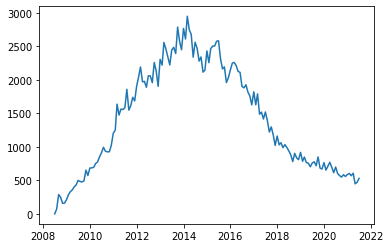

In [21]:
# Plot a single column
# or plt.plot(reshaped_df.index, reshaped_df.ruby)
plt.plot(reshaped_df.ruby)

**Styling the Chart**

`.figure()` - allows us to resize our chart

`.xticks()` - configures our x-axis

`.yticks()` - configures our y-axis

`.xlabel()` - add text to the x-axis

`.ylabel()` - add text to the y-axis

`.ylim()` - allows us to set a lower and upper bound

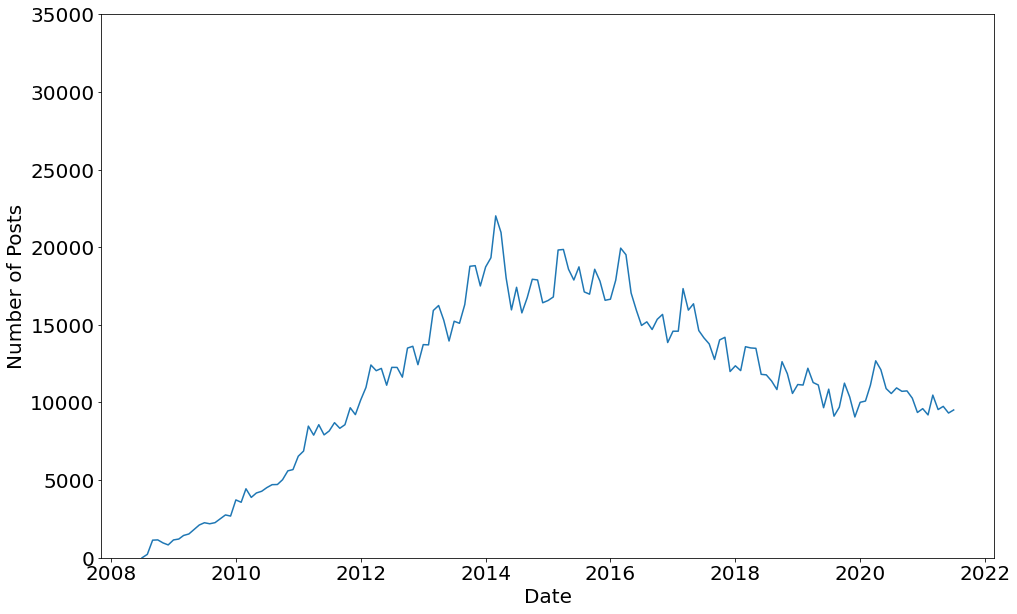

In [22]:
# Increase the size of the chart:
plt.figure(figsize=(16,10)) 
# Increase the fontsize of the ticks on the axes:
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# Add labels:
plt.xlabel('Date', fontsize=20)
plt.ylabel('Number of Posts', fontsize=20)
# Set a lower limit of 0 for the y-axis:
plt.ylim(0, 35000)

# Plot the chart
plt.plot(reshaped_df.index, reshaped_df.java)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

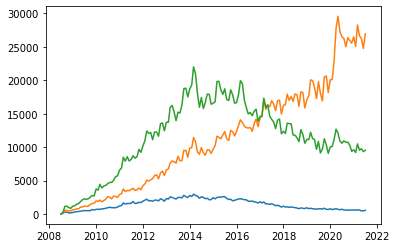

In [23]:
# Plot multiple lines on the same chart
plt.plot(reshaped_df.index, reshaped_df.ruby)
plt.plot(reshaped_df.index, reshaped_df.python)
plt.plot(reshaped_df.index, reshaped_df.java)

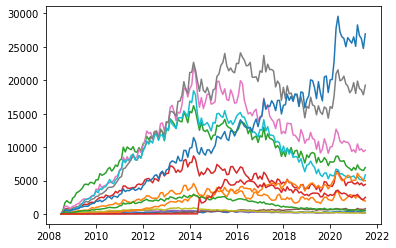

In [24]:
# Plot the whole DataFrame:
for column in reshaped_df.columns:
  plt.plot(reshaped_df[column])

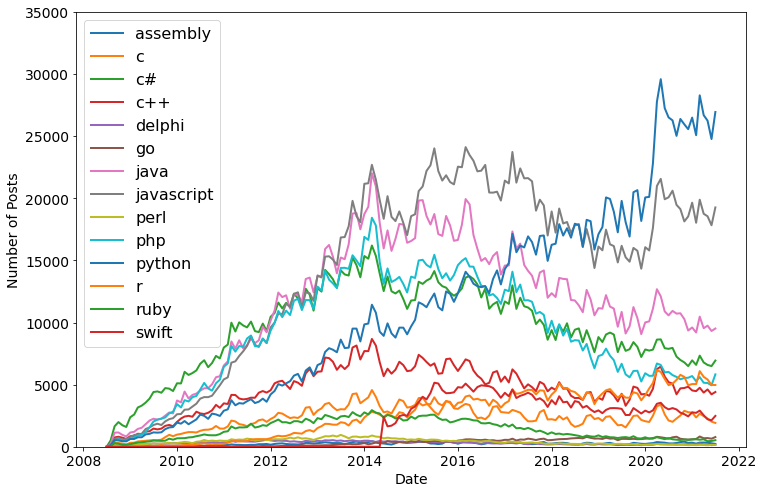

In [37]:
plt.figure(figsize=(12,8))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# Lines with labels:
for column in reshaped_df.columns:
    plt.plot(reshaped_df[column], linewidth=2, label=reshaped_df[column].name)

# Line labels box by adding a legend:
plt.legend(fontsize=16) 

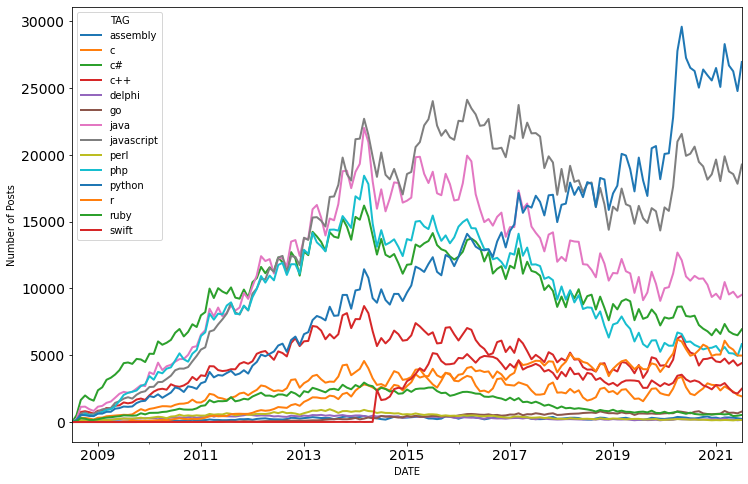

In [36]:
reshaped_df.plot(figsize=(12,8), fontsize=14, ylabel='Number of Posts', legend=16, linewidth=2)

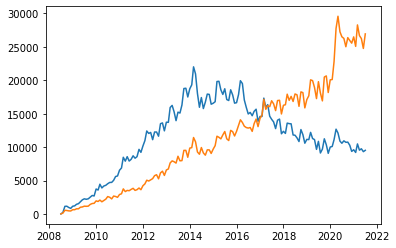

In [28]:
# One liner =)))
plt.plot(reshaped_df.index, reshaped_df[['java','python']])

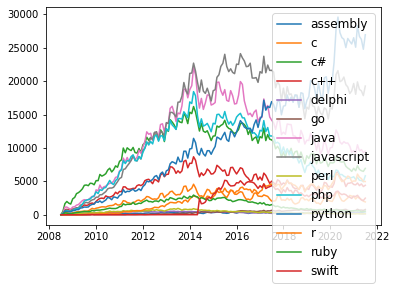

In [29]:
plt.plot(reshaped_df.index, reshaped_df)
plt.legend(fontsize=12, labels=reshaped_df.columns)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

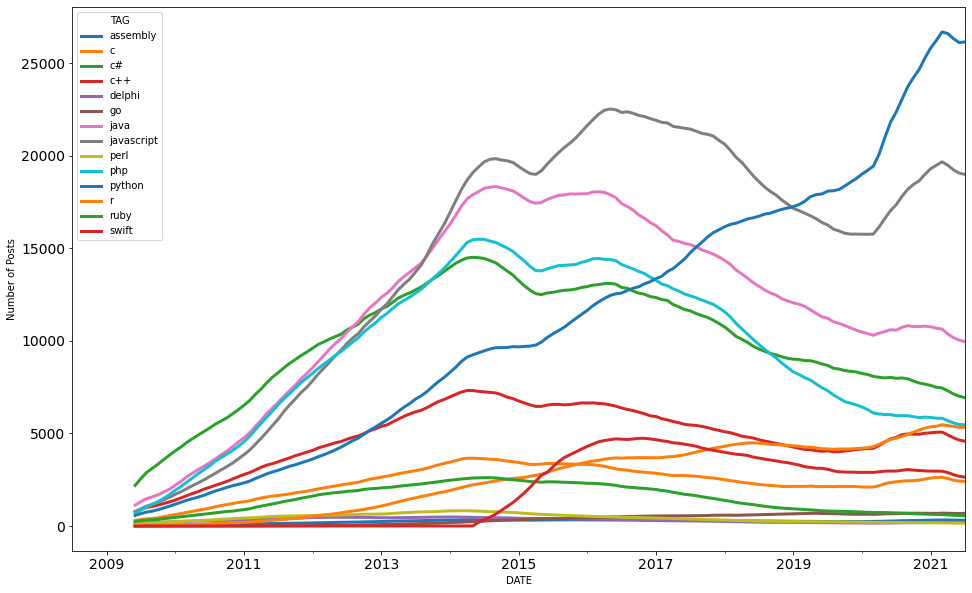

In [34]:
# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=12).mean()
roll_df.plot(figsize=(16,10), fontsize=14, ylabel='Number of Posts', legend=16, linewidth=3)